# Practical Exercise with MNIST Example

In [9]:
import torch
import torch.nn

In [10]:
import sys
import numpy as np
import matplotlib.pyplot as plt

from model import ImageClassifier
from data_loader import load_mnist

In [11]:
model_fn = "./model.pth"

In [12]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [13]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model']

In [14]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [15]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

In [19]:
model.parameters

<bound method Module.parameters of ImageClassifier(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=500, out_features=400, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=400, out_features=300, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): Linear(in_features=300, out_features=200, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Linear(in_features=200, out_features=100, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): BatchNorm1d(100, eps=1e-05, momentum=0.1

Accuracy: 1.0000


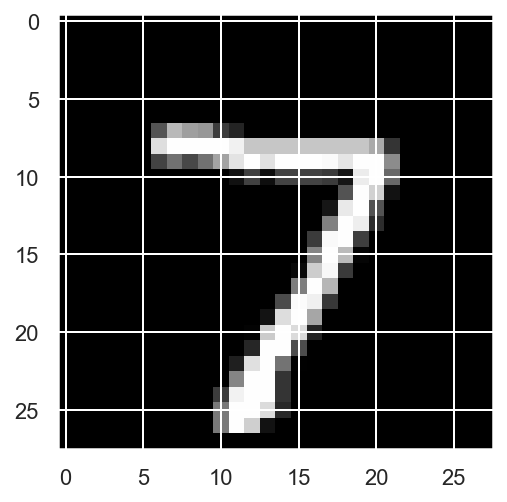

Predict: 7.0


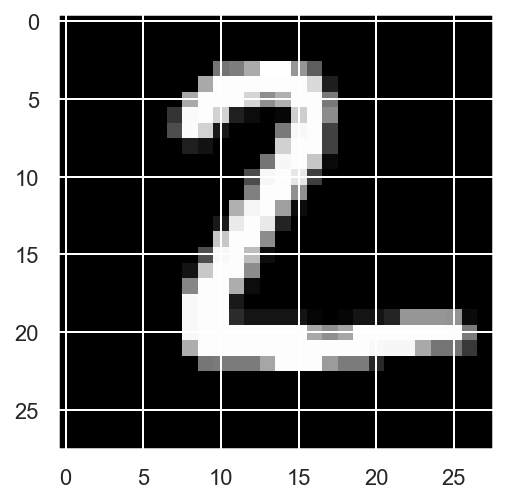

Predict: 2.0


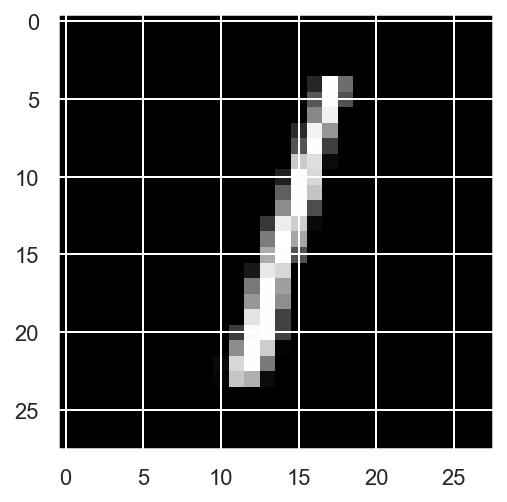

Predict: 1.0


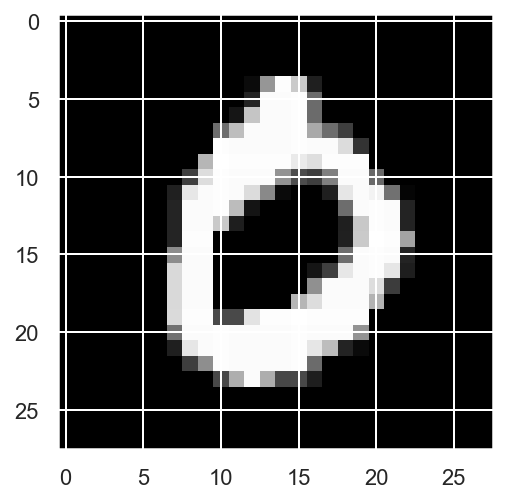

Predict: 0.0


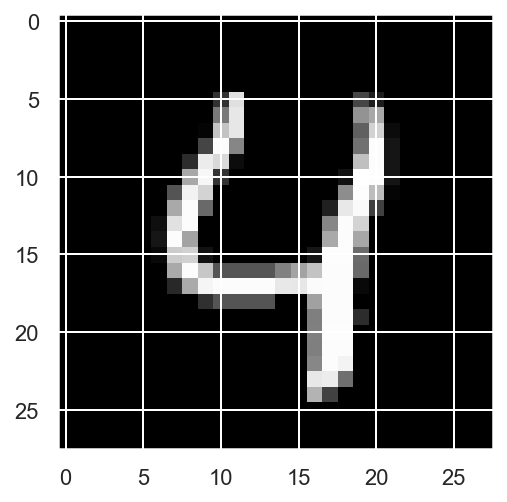

Predict: 4.0


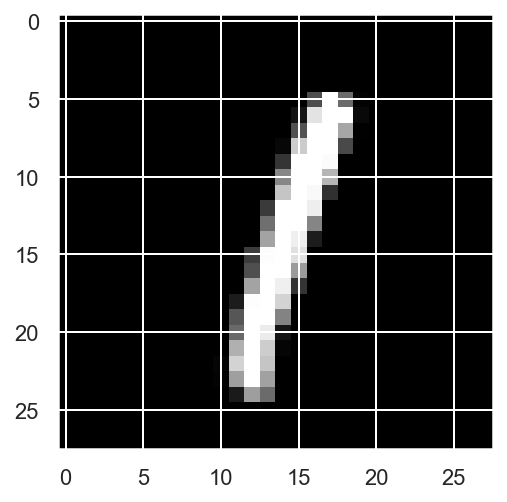

Predict: 1.0


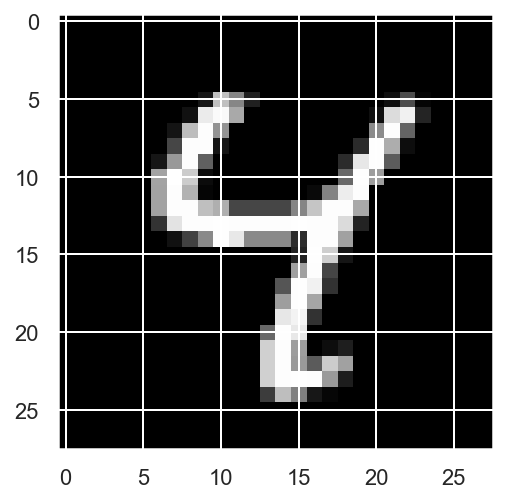

Predict: 4.0


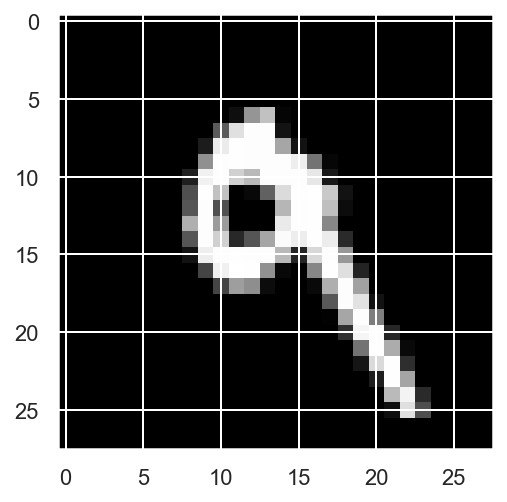

Predict: 9.0


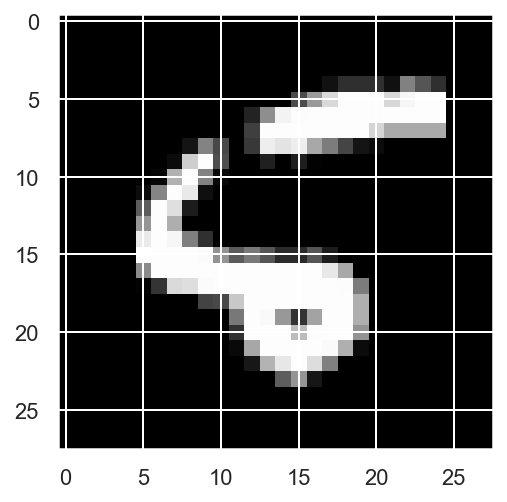

Predict: 5.0


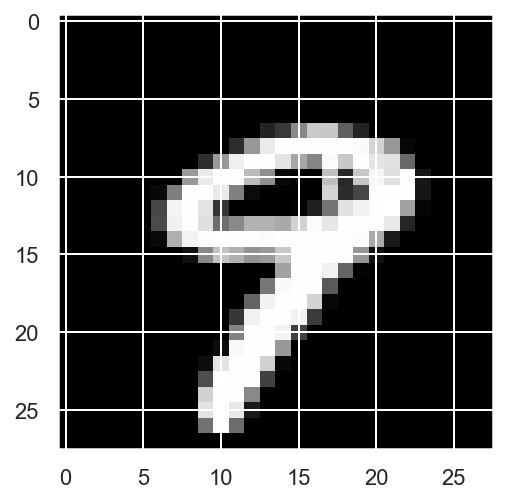

Predict: 9.0


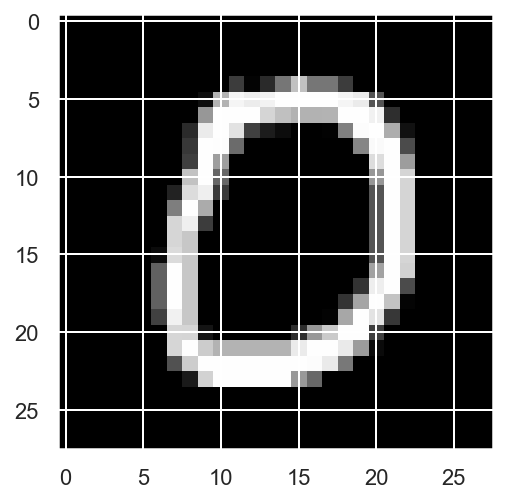

Predict: 0.0


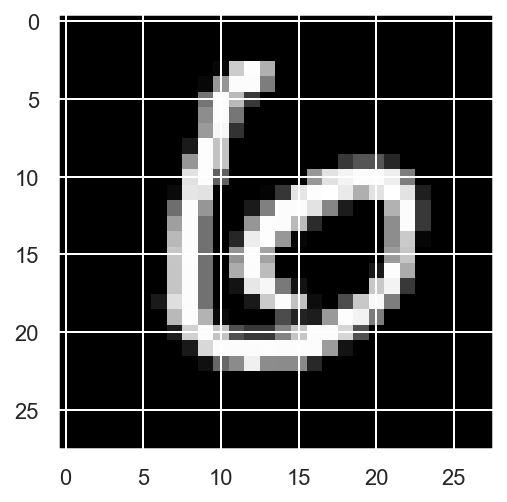

Predict: 6.0


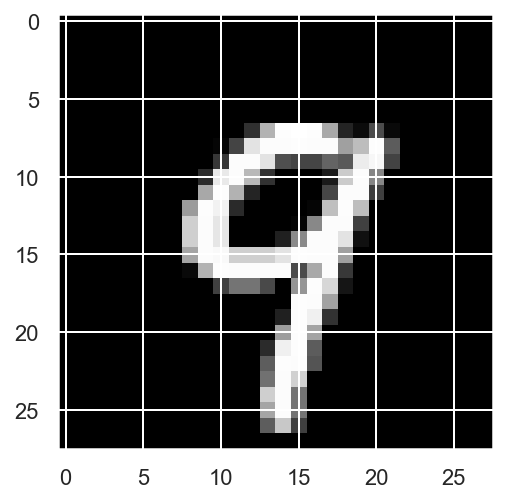

Predict: 9.0


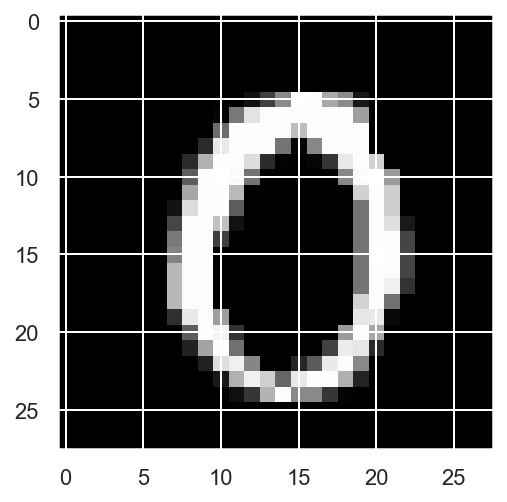

Predict: 0.0


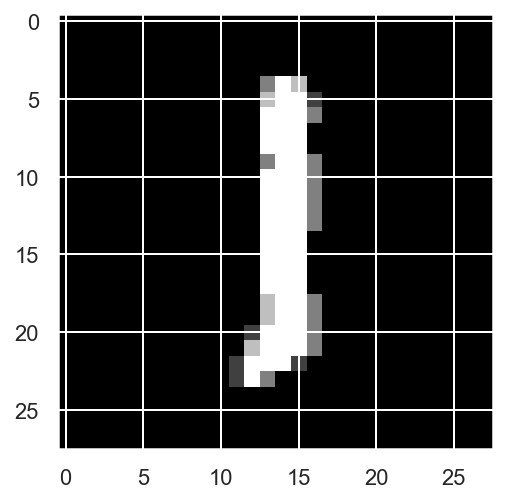

Predict: 1.0


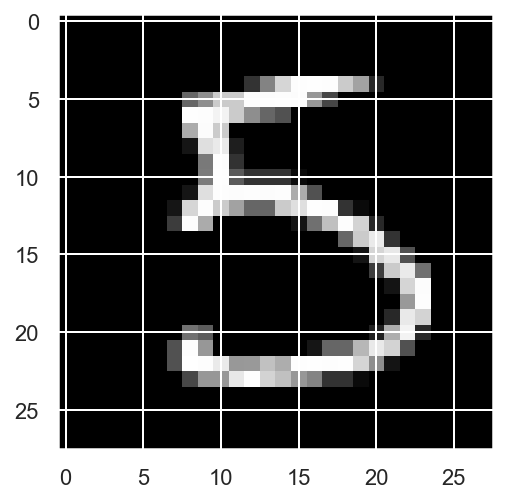

Predict: 5.0


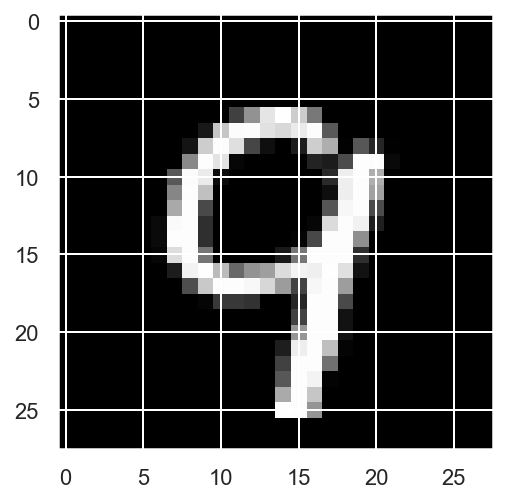

Predict: 9.0


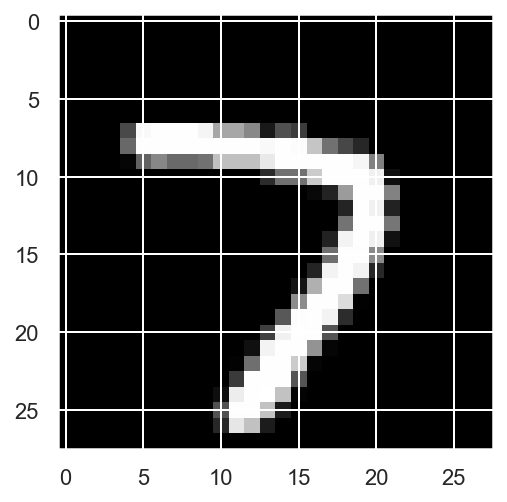

Predict: 7.0


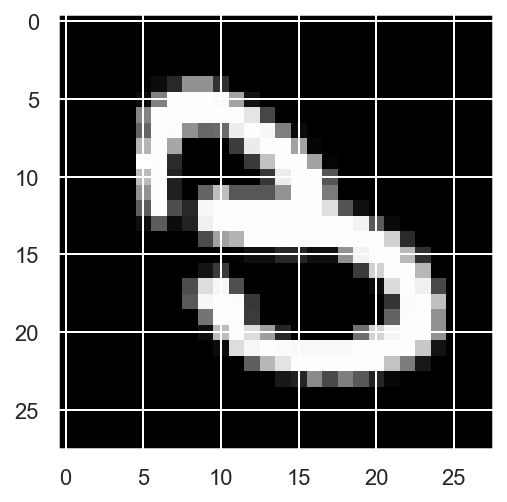

Predict: 3.0


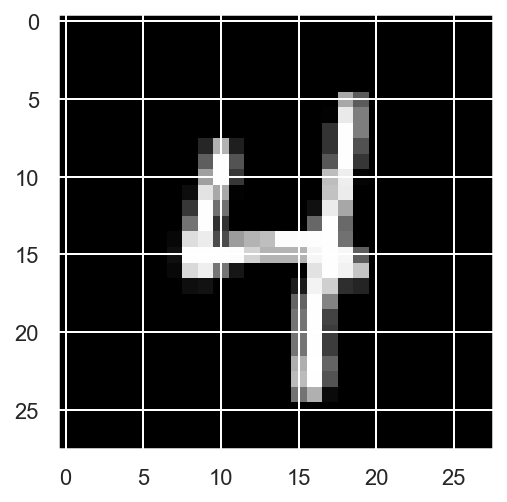

Predict: 4.0


In [16]:
# Load MNIST test set.
x, y = load_mnist(is_train=False, flatten=True)

x, y = x.to(device), y.to(device)

model = ImageClassifier(28**2, 10).to(device)
model.load_state_dict(load(model_fn, device))

test(model, x[:20], y[:20], to_be_shown=True)

In [22]:
def get_parameter_norm(parameters, norm_type=2):
    print(parameters)
    total_norm = 0

    try:
        for p in parameters:
            param_norm = p.data.norm(norm_type)
            total_norm += param_norm ** norm_type
        total_norm = total_norm ** (1. / norm_type)
    except Exception as e:
        print(e)

    return total_norm

In [21]:
get_grad_norm(model.parameters())

<generator object Module.parameters at 0x7fca35123430>


0.0

In [23]:
get_parameter_norm(model.parameters())

<generator object Module.parameters at 0x7fca3590dac0>


tensor(51.8239)

In [42]:
for p in model.parameters():
            print(p.shape)

torch.Size([500, 784])
torch.Size([500])
torch.Size([500])
torch.Size([500])
torch.Size([400, 500])
torch.Size([400])
torch.Size([400])
torch.Size([400])
torch.Size([300, 400])
torch.Size([300])
torch.Size([300])
torch.Size([300])
torch.Size([200, 300])
torch.Size([200])
torch.Size([200])
torch.Size([200])
torch.Size([100, 200])
torch.Size([100])
torch.Size([100])
torch.Size([100])
torch.Size([50, 100])
torch.Size([50])
torch.Size([50])
torch.Size([50])
torch.Size([10, 50])
torch.Size([10])
